# EDA: CNC Milling Dataset

This file is intended to perform data visualization. In the following, the experiment data are plotted and analyzed. 

In [68]:
import pandas as pd
import random
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np

In [50]:
# import data from one random experiment
#random.seed()
experiment_number = random.randint(10,18)
experiment = pd.read_csv('.\experiments\experiment_' + str(experiment_number) + '.csv')
experiment.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,144.0,2.97,12.50,144.0,2.96,0.536,4.16,0.0585,326.0,8.07,...,16.3,0.741,324.0,115.0,0.139,12.0,1.0,2.0,3.0,Prep
1,144.0,3.10,0.00,144.0,3.00,0.145,1.80,0.0716,327.0,11.00,...,27.9,0.968,323.0,120.0,0.183,12.0,1.0,69.0,3.0,Prep
2,144.0,2.92,31.30,144.0,3.00,0.000,4.19,0.0890,327.0,11.20,...,19.4,0.990,323.0,116.0,0.192,12.0,1.0,69.0,3.0,Prep
3,145.0,2.90,6.25,145.0,3.00,0.000,5.05,0.0883,327.0,10.20,...,16.5,0.752,324.0,115.0,0.143,12.0,1.0,71.0,3.0,Prep
4,145.0,3.00,25.00,145.0,3.00,0.000,3.35,0.0607,327.0,8.51,...,26.7,1.000,323.0,120.0,0.191,12.0,1.0,71.0,3.0,Prep


As a first step, one can drop the variables that, at firts sight, do not show any correlation with tool wear. They are:

- X1_ActualPosition;
- X1_CommandPosition;
- Y1_ActualPosition;
- Y1_CommandPosition;
- Z1_ActualPosition;
- Z1_CommandPosition;
- S1_ActualPosition;
- S1_CommandPosition;

It is seen that the parameter S1_SystemInertia remains the same over all experiments, as the same machine performs the machining operation. Therefore, this column will also be dropped and a variable spindle_inertia is created.

In [51]:
spindle_inertia = 12.0 #kg.m²
experiment.drop(['X1_ActualPosition', 'X1_CommandPosition', 'Y1_ActualPosition', 'Y1_CommandPosition', 'Z1_ActualPosition',
                'Z1_CommandPosition', 'S1_ActualPosition', 'S1_CommandPosition', 'S1_SystemInertia'], axis = 1, inplace = True)
experiment.head()

,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualVelocity,...,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,2.97,12.50,2.96,0.536,4.16,0.0585,326.0,8.07,0.000328,0.600,...,0.000000e+00,16.3,0.741,324.0,115.0,0.139,1.0,2.0,3.0,Prep
1,3.10,0.00,3.00,0.145,1.80,0.0716,327.0,11.00,0.000430,0.200,...,0.000000e+00,27.9,0.968,323.0,120.0,0.183,1.0,69.0,3.0,Prep
2,2.92,31.30,3.00,0.000,4.19,0.0890,327.0,11.20,0.000526,0.000,...,0.000000e+00,19.4,0.990,323.0,116.0,0.192,1.0,69.0,3.0,Prep
3,2.90,6.25,3.00,0.000,5.05,0.0883,327.0,10.20,0.000525,-0.025,...,9.540000e-07,16.5,0.752,324.0,115.0,0.143,1.0,71.0,3.0,Prep
4,3.00,25.00,3.00,0.000,3.35,0.0607,327.0,8.51,0.000331,-0.025,...,-9.540000e-07,26.7,1.000,323.0,120.0,0.191,1.0,71.0,3.0,Prep


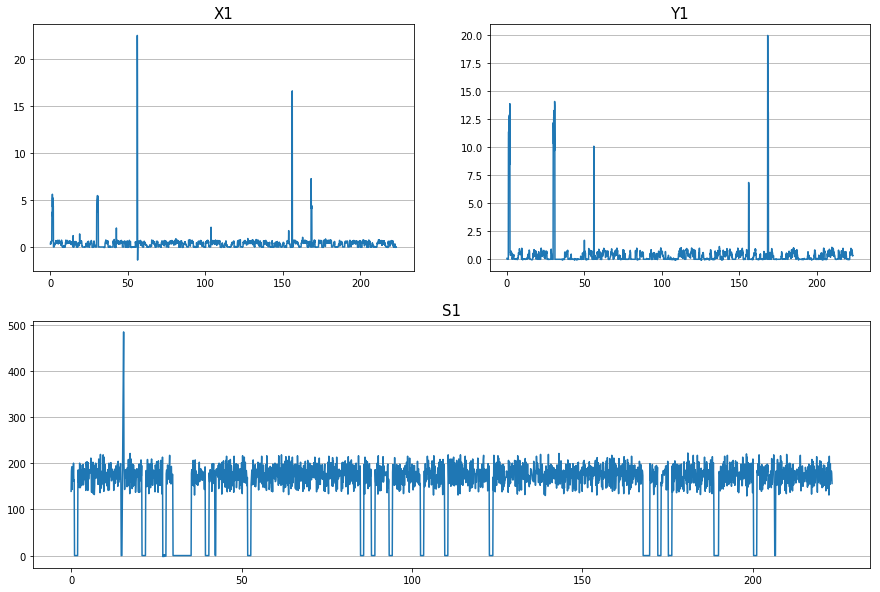

In [76]:
### SUBPLOTS FOR OUTPUT POWER ###
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize = (15,10))

# X1
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(np.arange(0,len(experiment.index)*0.1, 0.1), experiment['X1_OutputPower']*1000)
pl.title('X1', fontsize = 15)
pl.grid(axis = 'y')

# Y1
ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.plot(np.arange(0,len(experiment.index)*0.1, 0.1), experiment['Y1_OutputPower']*1000)
pl.title('Y1', fontsize = 15)
pl.grid(axis = 'y')

# S1
ax = pl.subplot(gs[1, :]) # row 1, span all columns
pl.plot(np.arange(0,len(experiment.index)*0.1, 0.1), experiment['S1_OutputPower']*1000)
pl.title('S1', fontsize = 15)
pl.grid(axis = 'y');